In [2]:
from network import SupplyChainNetwork
from Graphclass_module import Graphclass
from time import perf_counter
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import collections
%run network
%run Graphclass_module

In [3]:
sc = SupplyChainNetwork(1, 1, 1, network_data="08_25_2025_subgraph_edgelist.csv")

In [23]:
import networkx as nx

# Get degree sequence
degree_sequence = [d for _, d in sc.degree()]

# Count frequencies
degree_count = collections.Counter(degree_sequence)

AttributeError: 'SupplyChainNetwork' object has no attribute 'degree'

In [10]:
bloomberg_edge_coeff = np.log(sc.num_edges) / np.log(sc.num_nodes)

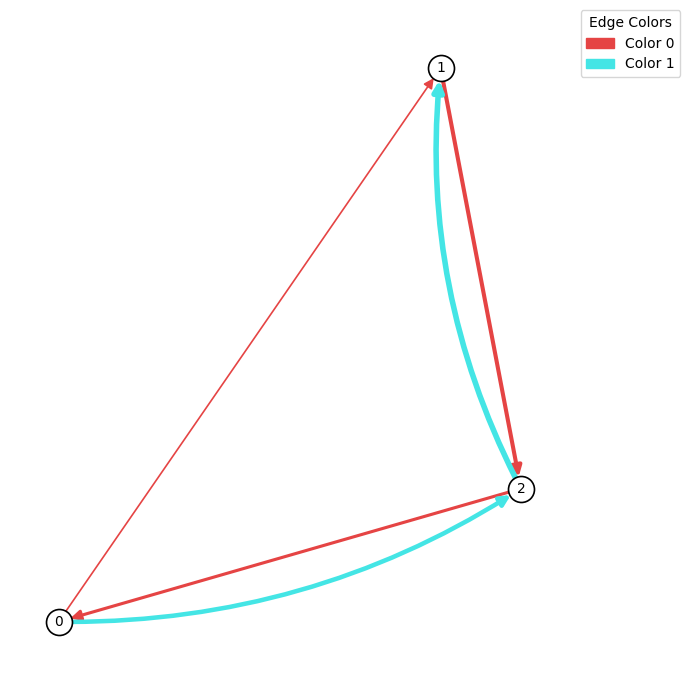

In [48]:
n1 = SupplyChainNetwork(3, 5, 2)
n1.visualize_supply_chain()

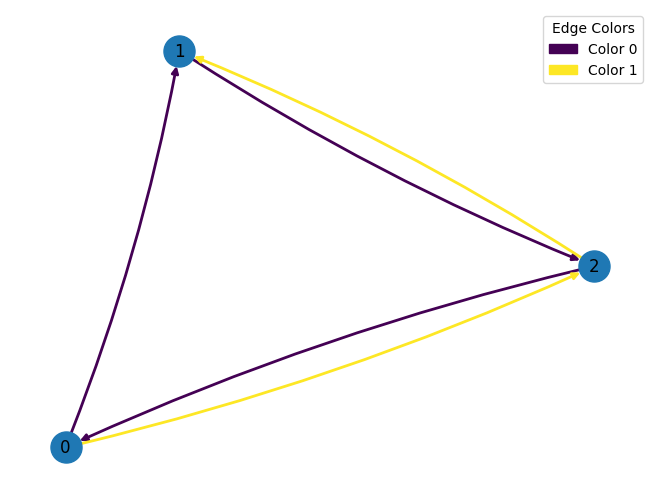

In [49]:
n2 = Graphclass(1, 1, 1, "random")
W = nx.to_numpy_array(n1.G, weight="weight")

n2.use_premade(n1.G, W)
n2.visualize_graph(n2.G)

4


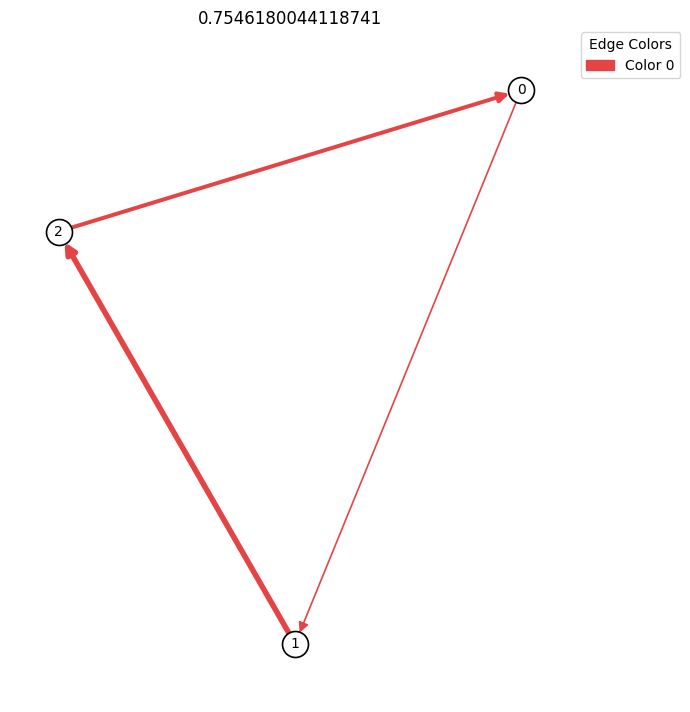

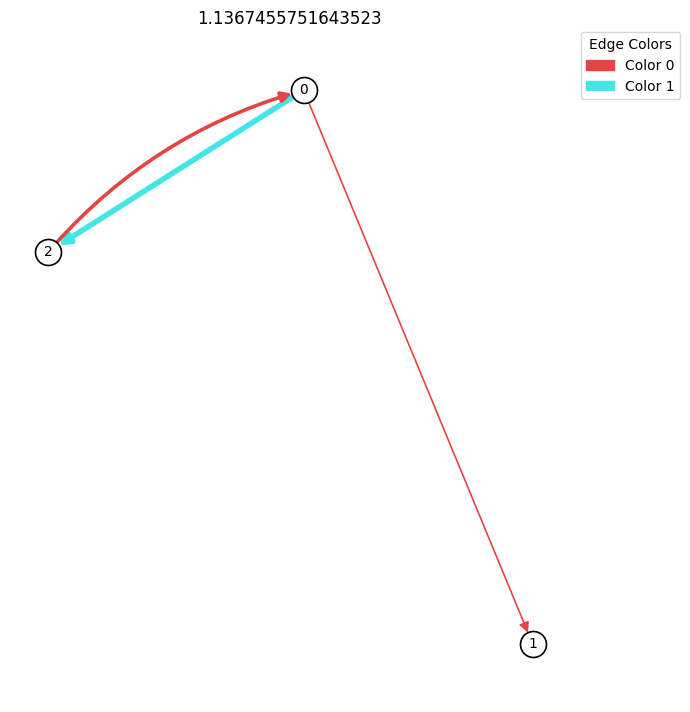

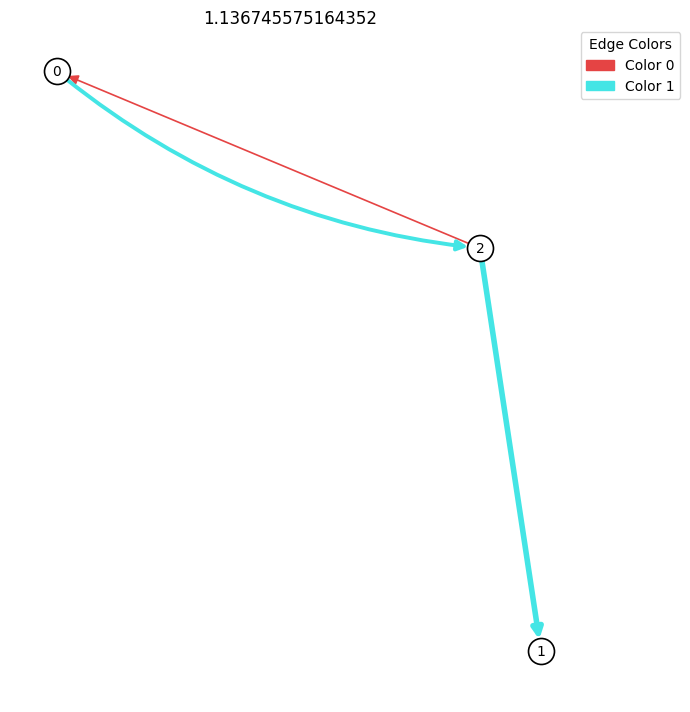

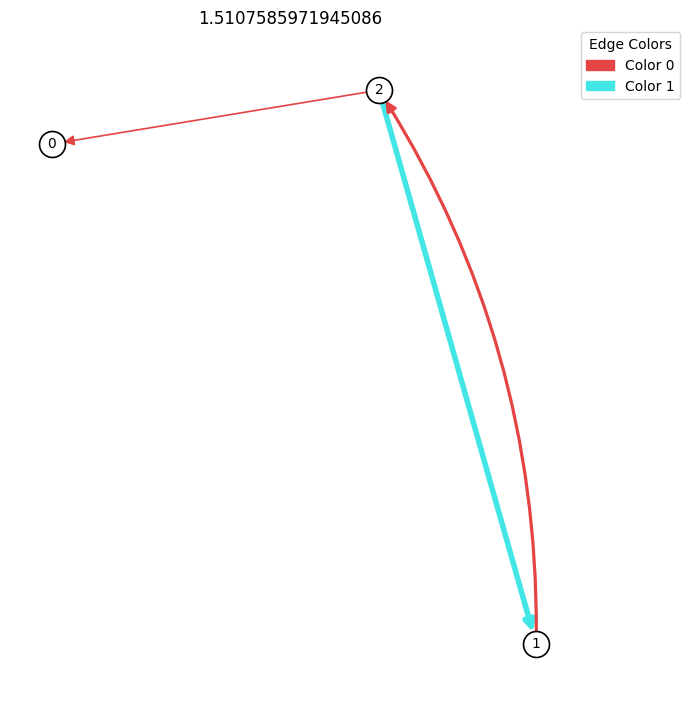

In [50]:
print(len(n1.subnetworks))
n1.visualize_subnetworks()

3


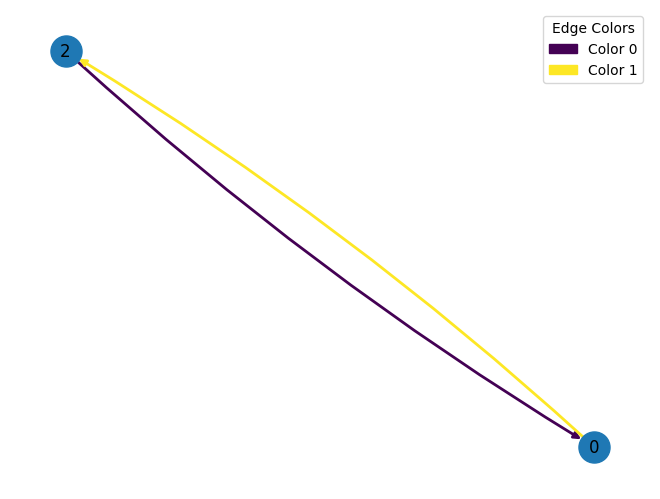

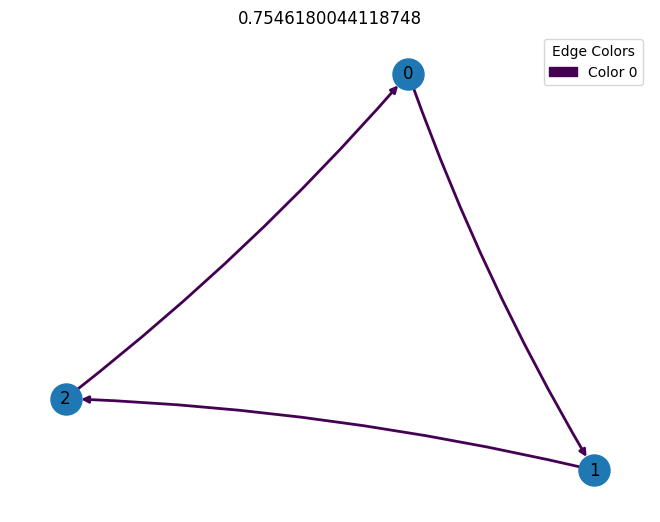

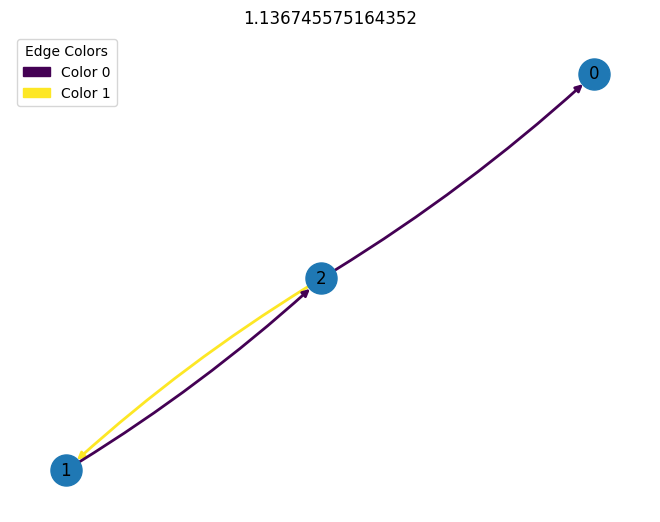

In [51]:
print(len(n2.subnetworks))
n2.visualize_subnetworks(n2.subnetworks)

In [2]:
star_times = []
bfs_times = [] 
col_vals = list(range(2, 9))

for col in col_vals:
    print(col)
    times_star = []
    times_bfs = []
    
    for _ in range(100):
        n1 = SupplyChainNetwork(10, 30, col)

        start = perf_counter()
        n1.calculate_subnetworks()
        end = perf_counter()

        times_star.append(end - start)

        start = perf_counter()
        n2 = Graphclass(10, 30, col, method="goliath")
        end = perf_counter()

        times_bfs.append(end - start)

    star_times.append(np.mean(times_star))
    bfs_times.append(np.mean(times_bfs))


2
3
4
5
6
7
8


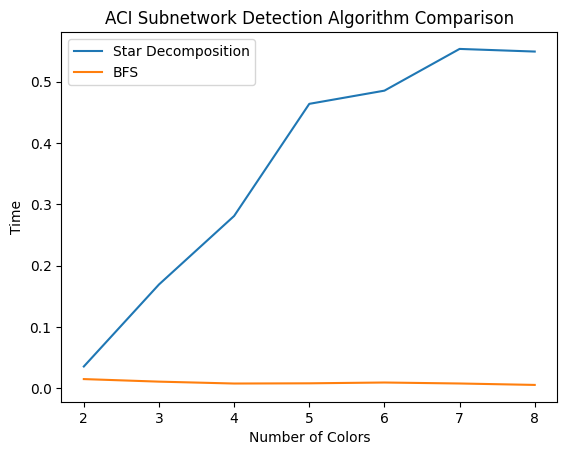

In [3]:
plt.plot(col_vals, star_times, label="Star Decomposition")
plt.plot(col_vals, bfs_times, label="BFS")

plt.xlabel("Number of Colors")
plt.ylabel("Time")
plt.title("ACI Subnetwork Detection Algorithm Comparison")

plt.legend()
plt.show()

In [4]:
n_vals = list(range(5, 31))
bloomberg_edge_coeff = np.log(sc.num_edges) / np.log(sc.num_nodes)
star_times = []
bfs_times = []

for n in n_vals:
    print(n)
    m = int(n**bloomberg_edge_coeff)
    times_star = []
    times_bfs = []

    for _ in range(100):
    
        n1 = SupplyChainNetwork(n, m, sc.num_colors)

        start = perf_counter()
        n1.calculate_subnetworks()
        end = perf_counter()

        times_star.append(end - start)

        n2 = Graphclass(n, m, sc.num_colors, method="goliath")
        
        start = perf_counter()
        n2.breadth_first()
        end = perf_counter()

        times_bfs.append(end - start)

    star_times.append(np.mean(times_star))
    bfs_times.append(np.mean(times_bfs))


5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


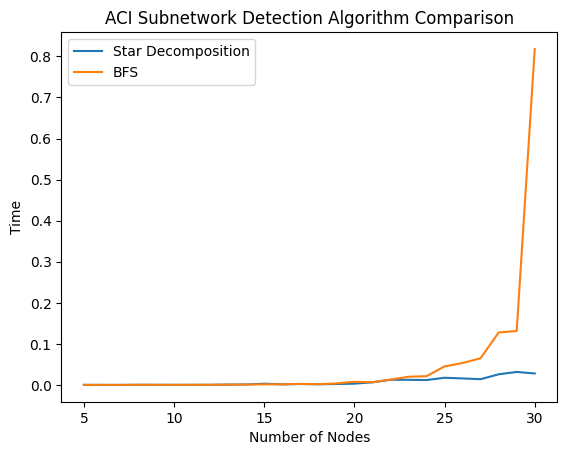

In [5]:
plt.plot(n_vals, star_times, label="Star Decomposition")
plt.plot(n_vals, bfs_times, label="BFS")

plt.xlabel("Number of Nodes")
plt.ylabel("Time")
plt.title("ACI Subnetwork Detection Algorithm Comparison")

plt.legend()
plt.show()

In [ ]:
n_vals = list(range(5, 27))
star_times = []
bfs_times = []

for n in n_vals:
    print(n)
    times_star = []
    times_bfs = []

    for _ in range(100):
        n1 = SupplyChainNetwork(n, 1, 8, method='scale_free')

        start = perf_counter()
        n1.calculate_subnetworks()
        end = perf_counter()

        times_star.append(end - start)

        n2 = Graphclass(1, 1, 1, "random")
        W = nx.to_numpy_array(n1.G, weight="weight")

        n2.use_premade(n1.G, W)
        
        start = perf_counter()
        n2.breadth_first()
        end = perf_counter()

        times_bfs.append(end - start)

    star_times.append(np.mean(times_star))
    bfs_times.append(np.mean(times_bfs))


5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


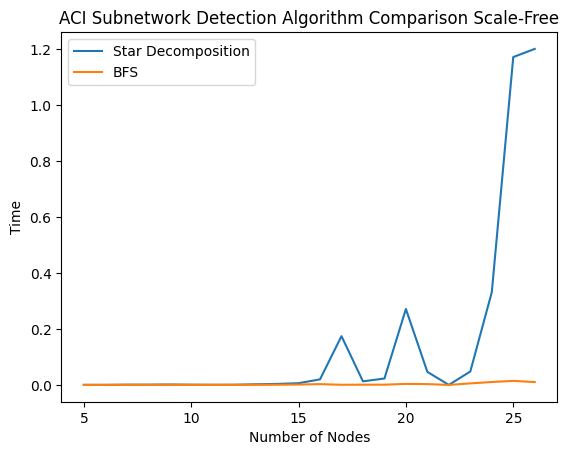

In [13]:
plt.plot(n_vals, star_times, label="Star Decomposition")
plt.plot(n_vals, bfs_times, label="BFS")

plt.xlabel("Number of Nodes")
plt.ylabel("Time")
plt.title("ACI Subnetwork Detection Algorithm Comparison Scale-Free")

plt.legend()
plt.show()